# Régression logistique

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [70]:
titanic = pd.read_csv('titanic_train.csv')

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

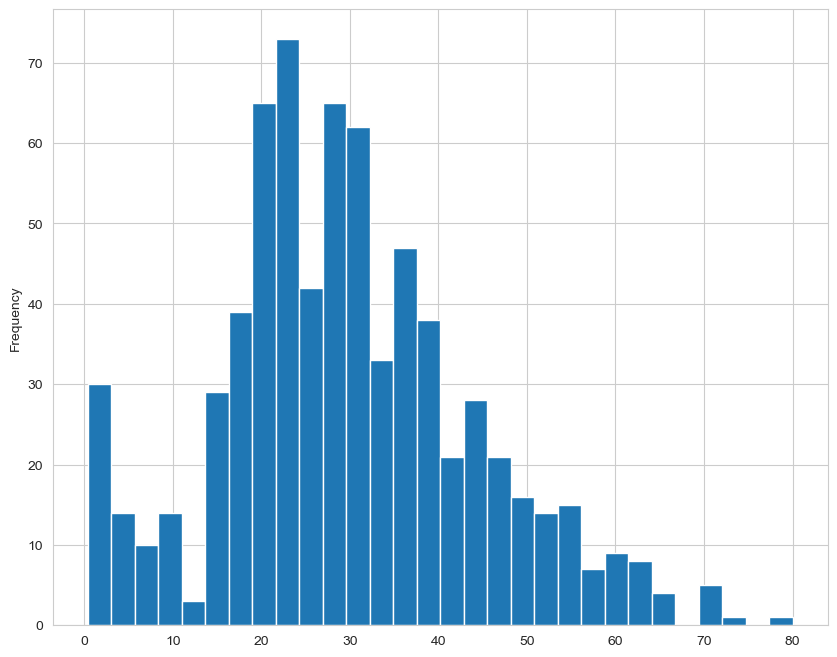

In [74]:
titanic['Age'].plot.hist(bins = 30, figsize = (10,8))
sns.set_style('whitegrid')

<Axes: ylabel='Frequency'>

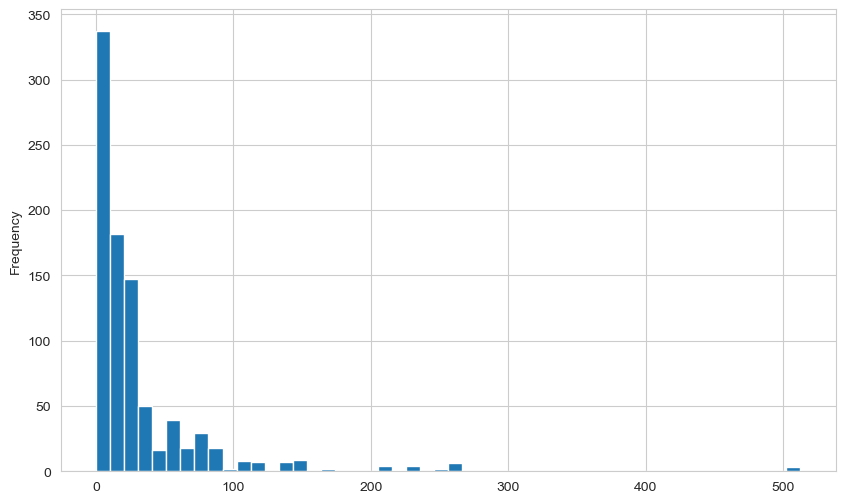

In [75]:
titanic['Fare'].plot.hist(bins = 50, figsize = (10,6))

<Axes: xlabel='Survived', ylabel='count'>

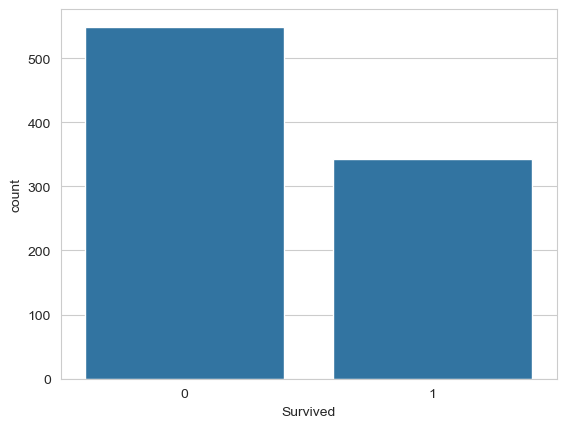

In [76]:
sns.countplot(x = 'Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

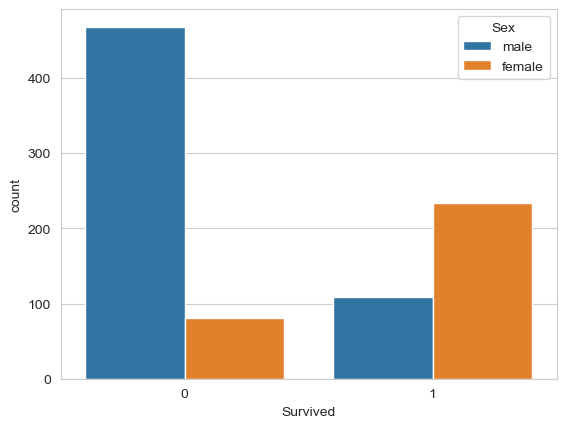

In [77]:
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

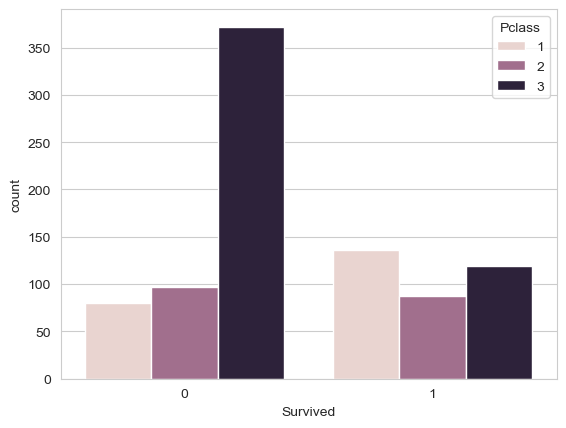

In [78]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='SibSp', ylabel='count'>

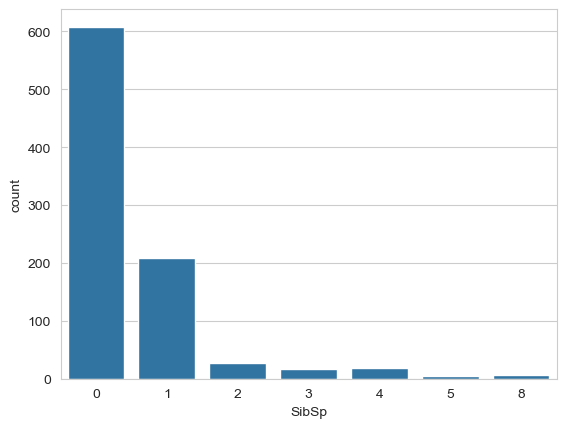

In [79]:
sns.countplot(x = 'SibSp', data = titanic)

<Axes: xlabel='Parch', ylabel='count'>

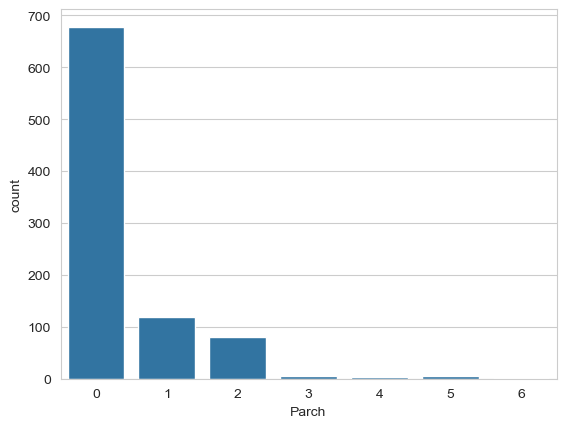

In [80]:
sns.countplot(x = 'Parch', data = titanic)

In [82]:
titanic.groupby('Pclass').mean(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [83]:
print(titanic['Pclass'].dtype)

int64


<Axes: xlabel='Pclass', ylabel='Age'>

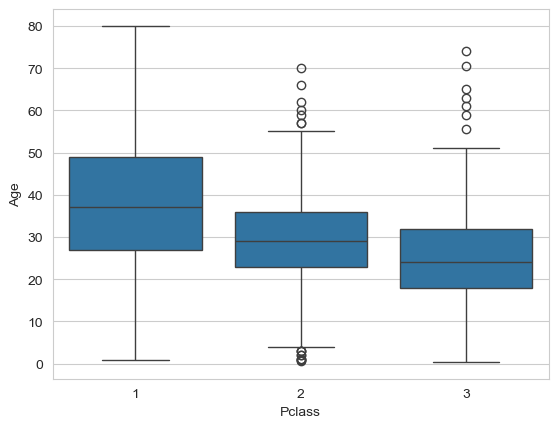

In [84]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [85]:
def imputer_age(colonnes):
    Age = colonnes[0]
    Pclass = colonnes[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [86]:
titanic['Age'] = titanic[['Age','Pclass']].apply(imputer_age, axis = 1)

C:\Users\Proprio\AppData\Local\Temp\ipykernel_42496\4254418992.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = colonnes[0]
C:\Users\Proprio\AppData\Local\Temp\ipykernel_42496\4254418992.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = colonnes[1]


In [87]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [89]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [90]:
titanic.dropna(inplace = True)

In [91]:
titanic['Sex'].replace(['male','female'], [1,0], inplace = True)

C:\Users\Proprio\AppData\Local\Temp\ipykernel_42496\2218716068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Sex'].replace(['male','female'], [1,0], inplace = True)
C:\Users\Proprio\AppData\Local\Temp\ipykernel_42496\2218716068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titan

In [92]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [93]:
titanic['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)

C:\Users\Proprio\AppData\Local\Temp\ipykernel_42496\3145388483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)
C:\Users\Proprio\AppData\Local\Temp\ipykernel_42496\3145388483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ti

In [94]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1


In [95]:
titanic.drop(['Name','Ticket','PassengerId'], axis =1, inplace = True)

In [96]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,25.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [97]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [98]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
888,3,0,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [99]:
y = titanic['Survived']

In [100]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print('Données entrainment: ', X_train.shape)
print('données de test: ', X_test.shape)

Données entrainment:  (622, 7)
données de test:  (267, 7)


In [102]:
model = LogisticRegression()

In [103]:
model.fit(X_train, y_train)

LogisticRegression()

In [104]:
predictions = model.predict(X_test)

In [105]:
print('Score sur la base des données d\'apprentissage :', model.score(X_train, y_train))
print('Score sur la base des données de test:', model.score(X_test,y_test))

Score sur la base des données d'apprentissage : 0.8183279742765274
Score sur la base des données de test: 0.7940074906367042


In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       160
           1       0.77      0.70      0.73       107

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [107]:
confusion_matrix(y_test, predictions)

array([[137,  23],
       [ 32,  75]], dtype=int64)